# **Introduction**

![alt text](https://miro.medium.com/max/1200/1*3ZbsByIqO_fze9p9-dmPJg.png)

Sering kita mendengar bahwa Machine Learning adalah alasan seseorang memasuki bidang Data Science. Walau begitu, kebanyakan individu hanya mampu membuat dan menggunakan model Machine Learning ini tanpa paham bagaimana mereka bekerja; atau bahkan menjelaskan hal yang mampu didapatkan melalui model Machine Learning. Padahal, kemampuan untuk memahami model Machine Learning adalah hal yang harus dimiliki untuk menjadi seorang Data Scientist yang sesungguhnya. Oleh karena itu, pada pertemuan hari ini kami ingin menjelaskan beberapa teknik yang bisa digunakan untuk mendapatkan Insight dari suatu model Machine Learning.

# **Data Understanding : `Titanic Disaster`**

Tahap awal dari proses pembuatan model ML oleh seorang data scientist adalah mengenal datanya terlebih dahulu untuk itu kita coba kenalan dengan dataset **`Titanic Disaster`** yang akan kita gunakan pada pertemuan hari ini

![alttext](https://media.nationalgeographic.org/assets/photos/000/273/27302_c0-41-990-701_r1050x700.jpg?d4ccf3044d9da0d0118103be3a76bd1319370847)

Tenggelamnya kapal titanic adalah salah satu peristiwa yang paling kelam dalam dunia pelayaran. Pada 15 April 1912 pada pelayaran perdananya kapal ini di sebut sebut **Tidak Bisa Di Tenggelamkan** namun pada kenyataanya kapal ini akhirnya tenggelam juga setelah menghantam bongkahan es berukuran besar naasnya pada kapal ini tidak terdapat **lifeboat** yang mencukupi untuk seluruh penumpang yang pada akhirnya mengakibatkan meninggalnya 1502 orang dari total 2224 penumpang dan cru kapal



**Variable / Atribut dalam dataset:**


*   PassengerID : Id penumpang
*   Pclass : Kelas penumpang (1 = VIP, 2 = Bisnis, 3 = Ekonomi)
*   Name : Nama penumpang
*   Sex : Jenis Kelamin
*   Age : Umur
*   SibSp : Jumlah sanak saudara di kapal
*   Parch : Jumlah orang tua / anak dari penumpang
*   Tiket : Nomor Tiket
*   Fare : Harga tiket
*   Cabin : Nomor Kabin
*   Embarked : Asal penumpang (C = Cherbourg, Q = Queenstown, S = Southampton)

**Class / Kategori pada dataset**
* Survived = penumpang selamat / tidak


**Tujuan Analisa Dataset Titanic**
1. Mengetahui pemumpang seperti apa yang selamat dari peristiwa mengerikan ini
2. Membuat model machine learning dengan prediksi terbaik




# **Exploratory Data Analysis (EDA)**


![alttext](https://miro.medium.com/max/2560/1*Ptv1_9wX9O2Rm2IBklyufw.png)

Ok teman teman untuk tahap berikutnya kita akan mencoba untuk melakukan EDA seperti yang sudah di bahas pada pertemuan ke-4. Berikut adalah hal hal yang akan kita lakukan pada tahapan ini:



1.   Mengekstrak variabel penting dan mengabaikan atau menghapus ariabel yang tidak berguna
2.   Mengidentifikasi pencilan(outliers), nilai yang hilang(missing values), atau kesalahan manusia (human error)
3.   Memahami hubungan, atau kekurangan, antar variabel




## **Data Wrangling**

**link download dataset:**
https://drive.google.com/file/d/1WFL0vSHCGW_eTp72KlBiZQWrGwNrvryy/view?usp=sharing



**Pertama tama mari kita inputkan dataset Titanic ke colab**

silahkan teman teman ketikan syntax berikut



```
# memanggil library
import pandas as pd


# mengupload data di komputer menggunakan Google
from google.colab import files
files.upload()

# membaca data dan menampilkannya
data = pd.read_csv('titanic.csv')
data
```



In [ ]:
# memanggil library
import pandas as pd
 
 
# mengupload data di komputer menggunakan Google
from google.colab import files
files.upload()
 
# membaca data dan menampilkannya
data = pd.read_csv('titanic.csv')
data

Saving titanic.csv to titanic.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Berikutnya kita akan coba untuk melakukan beberapa eksplorasi dasar**

yaitu :
1. Menampilkan statistika dataset
2. Menampilkan informasi dataset
3. Menampilkan kolom
4. Melihat hubungan antar variable

**1. Mendeskripsikan Data**

Menggunakan fungsi `describe()` , ini akan menampilkan statistika secara ringkas mulai dari jumlah data hingga nilai kuartil dari data tersebut. 

Silahkan ketikan syntax berikut:


```
data.describe()
```





In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Terdapat data yang hilang dibagian kolum Age

**2. Melihat Kolom Yang Ada Dalam Dataset**
Untuk melakukannya kita menggunakan fungsi ```keys()```. 

silahkan ketikan syntax berikut:


```
data.keys()
```



In [ ]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Dapat kita lihat bahwa terdapat 891 baris (rows) yang merepresentasikan **penumpang** dan 12 columns yang merepresentasikan karakteristik yang dimiliki oleh penumpang kapal Titanic. 

**3. Melihat Info Data**

Menggunakan fungsi `info()` kita akan melihat informasi dataset kita. Dimana, yang ditampilkan adalah nama kolom (attribute), jumlah data, keterangan (null atau non-null) dan tipe data  kolom. 
Silahkan ketikkan sintaks berikut :


```
data.info()
```



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Missing Values Handling**


Kita bisa memeriksa apakah dataset kita terdapat Missing Value atau tidak dengan snyax berikut:

```
# melihat total missing value pada data
print(data.isnull().sum())
```


In [ ]:
# melihat total missing value pada data
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Sebelumnya sudah ditampilkan informasi data dengan fungsi info(). Pada hasil outputnya entri dari dataset seharusnya adalah 890 perkolom. Namun masih dijumpai kolom yang entri nya dibawah 890 yaitu kolom **Age**, **Embarked**, dan **Cabin**. Oleh karena itu kita lakukan Missing Values Handling.

**Missing values** merupakan keadaan dimana saat data kita sudah dilakukan EDA 1 (Exploratory Data Analysis) masih terlihat belum cocok jika dibenamkan *classifier/algoritma* `machine learning`. Diantara missing values handling yang dilakukan pada pembelajaran kali ini adalah mengisi data kosong. 

Menggunakan perintah ```fillna``` kita isi kolom **Age** dengan **nilai rata - rata**. Dikodingan ditunjukkan dengan ```data.age.mean()```. Sedangkan kolom **Embarked** kita isi dengan **nilai modus** .

In [ ]:
data.Age.fillna(data.Age.mean(), inplace=True)

In [ ]:
dummy = data.Embarked.mode()
dummy

0    S
dtype: object

In [ ]:
data.Embarked.fillna('S', inplace=True)

Setelah proses mengisi kolom data telah dilakukan, kita lihat jumlah entri untuk masing - masing kolom tadi dengan fungsi ```info()```. Lalu bagaimana dengan kolom **Cabin** ? Pada pertemuan ini tidak dilakukan apa-apa pada kolom itu

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Oke, dataset kita sudah siap untuk dilakukan training (pelatihan) namun untuk memudahkan akan di lakukan Agregasi atau penggabungan kolom agar mudah dibaca nantinya.

# **Agregation Data Untuk Menemukan Informasi**

Sebelumnya kita coba mencari variable apa saja yang mempengaruhi dalam menentukan apakah penumpang dikategorikan selamat / tidak dan kita sudah membuat beberapa dugaan awal, berikutnya kita akan menguji dugaan tersebut dengan melakukan agregasi data 
menggunakan fungsi `groupby()` untuk menggabungkan 2 kolom data. 


## **a. Melihat hubungan antar variable dengan korelasi**

Dalam pembuatan model ML terutama yang menggunakan klasifikasi kita harus melihat hubungan antar variable dalam dataset dalam menentukan **Class / Category**. hal ini berfungsi ketika kita memiliki banyak variable dan ingin mengetahui "Kira kira variable apa yang paling berpengaruh?" 

untuk menemukan hubungan antara variable dalam dataset kita dapat menggunakan **fungsi korelasi** lalu memvisualisasikannya dengan **Heatmap**

tapi sebelum itu kita harus melakukan konversi data pada kolom **Sex** dari **Kategorikal** ke **numerik**

Silahkan ketikan syntax dibawah ini:



```
# Membuat data dummy
dummy = data
dummy['Sex'].replace(['female', 'male'], [0,1], inplace=True)
```



```
# Membuat visualiasi korelasi antar variable
import seaborn as sns
corr = data.corr()
sns.heatmap(corr)
```



In [ ]:
# Membuat data dummy
dummy = data
dummy['Sex'].replace(['female', 'male'], [0,1], inplace=True)

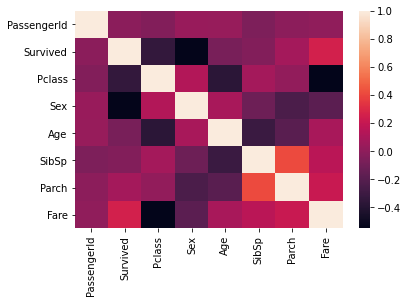

In [ ]:
import seaborn as sns
corr = dummy.corr()
sns.heatmap(corr)

**Mari kita bahas**

**Dalam korelasi hubungan antara variable digambarkan dengan nilai dari -1 sampai 1 (Berkorelasi positif / Negatif)** dimana bila nilai korelasi mendekati 1 maka hubungan tersebut kuat sedangkan bila nilai korelasi mendekati 0 maka hubungannya lemah

* **Korelasi Positif** : Bila variable sumbu X tinggi maka variable Y juga tinggi
* **Korelasi Negatif** : Bila variable sumbu X tinggi maka variable Y rendah


**Dari hasil visualisasi diatas kita berfokus**
pada variable **Survied**, dapat kita lihat bahwa variable yang paling berpengaruh dalam tingkat keselamatan penumpang adalah:
1. Pclass (Berkorelasi Negatif)
2. Sex (Berkorelasi Negatif)
3. Fare (Berkorelasi Positif)

**Dari sini dapat kita peroleh informasi sebagai dugaan awal(Hipotesis 0):**
1. Penumpang dengan kategori kelas 1 memiliki peluang **Selamat** lebih tinggi
2. **Penumpang wanita lebih banyak yang selamat dari pada pria**, hal ini karena dalam prosedur evakuasi penumpang wanita dan anak anak akan didahulukan
3. **Harga tiket** akan menentukan jenis kelas penumpang yang **secara tidak langsung mempengaruhi peluang penumpang tersebut selamat** dalam insiden ini



## **b. Mengetahui Banyaknya Penumpang Titanic**
Gabungkan kolom antara **Pclass** dan **PassangerID**. 

Silahkan ketikan syntax dibawah ini:



```
data.groupby(by=['Pclass'])['PassengerId'].count()
```

Fungsi **groupby()** adalah fungsi yang digunakan untuk mengelompokan data, sebagai contoh disini kita mengelompokan data berdasarkan **variable Pclass** dan **PassengerID** sedangkan fungsi **count()** adalah untuk menghitung jumlah data pada variable PassangerId pada tiap tiap **Pclass**



In [ ]:
data.groupby(by=['Pclass'])['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


Terlihat bahwa pada kelas 1 jumlah penumpangnya adalah 216 orang, untuk kelas 2 ada 184 orang, dan kelas 3 adalah 491 orang. 



## **c. Tarif/Harga Tiket Titanic Tahun 1912 (dalam Euro)**
Mari kita lihat berapa rata rata tarif/harga setiap kelasnya pada saat itu (tahun 1912) dengan menggabungkan kolom **Pclass** dengan **Fare**. For your information, untuk kurs saat ini 1 Euro = Rp. 17.485,01 -. 

silahkan ketikan syntax berikut ini:


```
data.groupby(by=['Pclass'])['Fare'].mean()
```

**Mengapa kita mengambil rata rata harga tarif?** karena walaupun sama kelasnya ambil contoh VIP harganya masih tergantung asal pemberangkatan penumpang (Embarkation) dan fasilitas yang ada dalam kamar 


In [ ]:
data.groupby(by=['Pclass'])['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Terlihat bahwa untuk tarif kelas 1 = 84.15 Euro, kelas 2 = 20.66, dan kelas 3 = 13.67 Euro. Misalnya kalau kita kalikan dengan kurs sekarang untuk kelas 3-nya saja harganya sudah mencapai Rp. 211.680 pada tahun 1912. 

## **d. Jumlah yang Selamat**

Pada kolom Survived, yang selamat dinotasikan dalam angka 1 dan yang tidak dinotasikan dengan angka 0. Nah kita gabungkan kolom **Survived**. 

In [ ]:
survived_count = data.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

Dari output diatas kita mengetahui bahwa yang selamat sebanyak 342 orang dan yang tidak selamat 549 orang. Mungkin akan lebih mudah dipahami dengan menampilkannya dalam bentuk chart bukan. Mari kita coba.

```
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()
```

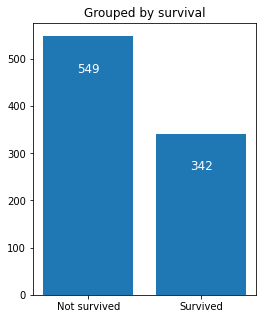

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

## **e. Yang Selamat Berdasarkan Gender (Jenis Kelamin)**

Kita gabungkan 2 kolom yaitu kolom **Sex** dengan **Survived** dan menggunakan fungsi `sum()` kita hitung jumlah mereka. Kenapa kita tidak menggunakan fungsi `count()` ? Karena kita hanya akan berfokus ke siapa yang **Selamat** yang representasinya adalah angka 1 di dalam kolom Survived.



In [ ]:
survived_sex = data.groupby('Sex')['Survived'].sum()
survived_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

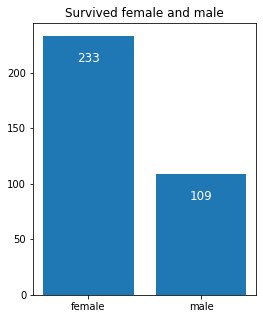

In [ ]:
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Dari output bisa terlihat bahwa perempuan adalah orang yang paling banyak selamat. 

## **f. Yang Selamat Berdasarkan Kelas Penumpang**

Untuk mengetahuinya silahkan ketikan syntax berikut:

```
survived_Pclass = data.groupby('Pclass')['Survived'].sum()
survived_Pclass
```



In [ ]:
survived_Pclass = data.groupby('Pclass')['Survived'].sum()
survived_Pclass

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

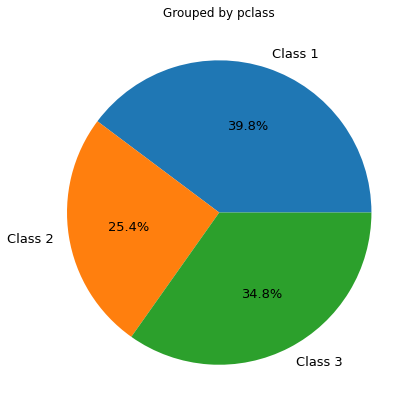

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(survived_Pclass.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

Dari hasik output tersebut ternyata benar bahwa penumpang kelas 1 lebih banyak yang selamat dari pada kelas yang lain

## **g. Distribusi Pclass**

untuk melihat distribusi Pclass silahkan ketikan syntax berikut



```
import matplotlib.pyplot as plt
pclass_count = data.groupby('Pclass')['Pclass'].count()
```

selanjutnya kita coba visulasisasikan dengan syntax berikut:



```
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()
```





In [ ]:
import matplotlib.pyplot as plt
pclass_count = data.groupby('Pclass')['Pclass'].count()

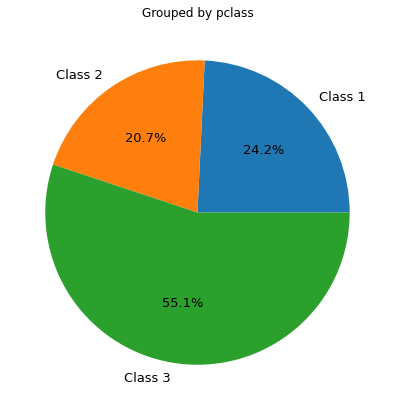

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

Terlihat pada visualisasi diatas bahwa sebagian besar penumpang kapal titanic di dominasi oleh penumpang kelas 3 yang merupakan kaum imigran yang ingin mengadu nasib di amerika dan kanada

## **h. Distribusi Asal Penumpang**

untuk melihat distribusi asal penumpang kapal titanic silahkan ketikan syntax berikut:



```
embarkation_count = data.groupby('Embarked')['Embarked'].count()
```

selanjutnya kita buat visualisasinya dengan syntax berikut:


```
plt.figure(figsize=(7,7))
plt.title('Grouped by Embarkation')
plt.pie(embarkation_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()
```




In [ ]:
embarkation_count = data.groupby('Embarked')['Embarked'].count()

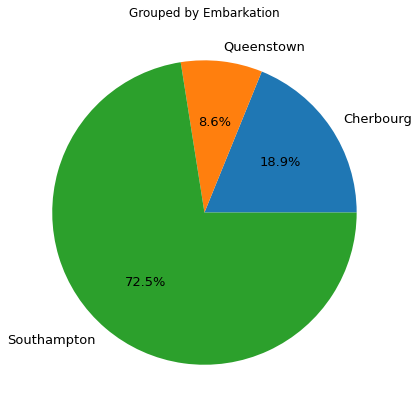

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('Grouped by Embarkation')
plt.pie(embarkation_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

Dari visualisasi tersebut dapat terlihat bahwa sebagian besar penumpang kapal titanic berasar dari Southampton

# **Preprocessing Data**

Pada tahap pra proses ini kita melakukan transformasi data hingga encoding data. Apa itu encoding ? **Encoding** adalah proses mengubah data dari bentuk A menjadi bentuk B, entah dari data yang awalnya kategorik menjadi numerik. Proses sebaliknya disebut dengan **Decode**.

Pertama - tama dimulai dengan melihat kolom terlebih dahulu menggunakan fungsi ```columns```. 

In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## **1. Menentukan Predictor**

Nah, prediktor digunakan untuk memprediksi suatu data. Dimana **x** adalah data prediktor dan **y** adalah data. 

Karena data tidak semuanya bisa dimasukkan dalam `machine` `learning` sebagai *prediction*. Contoh variable yang bisa digunakan adalah :


1.   Ordinal : weather, cloth size, customer satisfication, user rating. 
2.   Temperature : misalnya suhu. 
3.   Interval : m
4.   Ratio   

Contoh tipe data yang tidak dapat digunakan sebbagai `predictor` pada ML adalah :
1. Usia
2. Jenis Kelamin
3. Nama Kota. 
4. dan lain - lain

Untuk prediktor, kolom yang akan diambil adalah **[Pclass, Sex, SibSp, Fare, Parch, dan Embarked]** . 

In [ ]:
#x data predictor
#y data 
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Parch', 'Embarked']]
#Select Predictor

Jika sudah, mari kita lihat kolom tadi dengan mencetak **x**. 

In [ ]:
x

,Pclass,Sex,Age,SibSp,Fare,Parch,Embarked
0,3,male,22.000000,1,7.2500,0,S
1,1,female,38.000000,1,71.2833,0,C
2,3,female,26.000000,0,7.9250,0,S
3,1,female,35.000000,1,53.1000,0,S
4,3,male,35.000000,0,8.0500,0,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,13.0000,0,S
887,1,female,19.000000,0,30.0000,0,S
888,3,female,29.699118,1,23.4500,2,S
889,1,male,26.000000,0,30.0000,0,C


## **2. Encoding**

Kali ini untuk melakukan proses Encoding kita menggunakan library ```Scikit-Learn``` atau sering disingkat dengan ```Sklearn```. Dan menggunakan fungsi ```LabelEncoder()```.

In [ ]:
from sklearn import preprocessing 
ls = preprocessing.LabelEncoder()

Kita akan meng-encode kolom **Sex** dan **Embarked**. Dan ditampung dalam variable baru yaitu **Sex_encoded** dan **Embarked_encoded**. 

In [ ]:
x['Sex_encoded'] = ls.fit_transform(x['Sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['Embarked_encoded'] = ls.fit_transform(x['Embarked'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
y = data['Survived']

# **Training Data Titanic dengan Berbagai Macam Algoritma Machine Learning**

Menggunakan library ```Sklearn```.  Kita panggil semua classifier yang akan digunakan yaitu ```KNN```, ```Naive Bayes Multinomial``` dan `RandomForest`.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
#memilih algoritma yang paling bagus akurasinya
from sklearn import model_selection

## **1. Membangun Model**

Model adalah sebutan untuk suatu data yang sudah memuat dataset yang sudah dilakukan proses training. Disini model yang dibangun menggunakan algoritma yang sudah di deklarasikan tadi.

In [ ]:
models =[MultinomialNB(),
         KNeighborsClassifier(),
         RandomForestClassifier()]

In [ ]:
x = x[['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Fare', 'Parch', 'Embarked_encoded']]

Karena datanya banyak, proses training kita bagi menjadi per 100 data. Dengan ```seed``` sebanyak 7. Ohiya, pada pelatihan ini modelnya akan di evaluasi dengan ```k-Fold Cross Validation```. Dengan menggunakan kodingan ```scoring=accuracy```, nantinya hasil output akan menampilkan hasil tiap algoritma dengan masing - masing skor akurasinya.

**+Penjelasan**

In [ ]:
n_splits=100
seed = 7 
results = []
for model in models:
  kfold = model_selection.KFold(n_splits=n_splits, random_state=seed)
  cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  results.append(cv_results)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Tampilkan hasil nya dengan library ```Pandas``` dan tampung menggunakan variables ```results```. 

In [ ]:
df_results = pd.DataFrame(results)
df_results = df_results.T
df_results.columns = ['Naive Bayes', 'KNN', 'RandomForest']
df_results

,Naive Bayes,KNN,RandomForest
0,0.666667,0.555556,1.000000
1,0.555556,0.444444,0.777778
2,0.444444,0.333333,0.666667
3,0.444444,0.666667,0.444444
4,0.666667,0.777778,0.555556
...,...,...,...
95,0.500000,0.625000,0.625000
96,0.500000,0.875000,1.000000
97,0.625000,0.750000,1.000000
98,0.750000,0.875000,0.875000


Bagaimana akurasinya ? Oke, kita mendapatkan model dengan `RandomForest` menghasilkan akurasi tertinggi yaitu 100%. Maka model itulah yang akan kita pakai untuk melakukan prediksi.

In [ ]:
df_results.describe()

,Naive Bayes,KNN,RandomForest
count,100.000000,100.000000,100.000000
mean,0.689028,0.708889,0.808750
std,0.160544,0.147157,0.121191
min,0.333333,0.333333,0.444444
25%,0.555556,0.555556,0.777778
50%,0.666667,0.750000,0.777778
75%,0.777778,0.777778,0.888889
max,1.000000,1.000000,1.000000


# **Melakukan Prediksi dengan Model yang Terbaik**

In [ ]:
model = RandomForestClassifier()

In [ ]:
rf = model.fit(x, y)

In [ ]:
rf.predict_proba(x[:10])

array([[0.84733333, 0.15266667],
       [0.01      , 0.99      ],
       [0.15      , 0.85      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.98705556, 0.01294444],
       [0.89      , 0.11      ],
       [0.89      , 0.11      ],
       [0.22      , 0.78      ],
       [0.03      , 0.97      ]])

# **Referensi**



*   Bootcamp Machine Learning by **Data Synthesis**
* https://www.kaggle.com/c/titanic/data
*   https://medium.com/purwadhikaconnect/metode-feature-importance-dalam-data-science-yang-perlu-kamu-ketahui-6b4f35db6476


